# Homework 4: Data Visualization
- **Name**:  Jatin Ajit Shenoy
- **UB Username**: jatinaji
- **UB Person Number**:  50506688

---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# Read the data from the CSV file, ignoring lines starting with '%'
data = pd.read_csv('/content/sample_data/scatter_data.csv', comment='%')

In [33]:
# Extract the x and y coordinates from the data by index
x = data.iloc[:, 0]  # Assuming that the x-coordinate is in the first column (index 0)
y = data.iloc[:, 1]  # Assuming that the y-coordinate is in the second column (index 1)


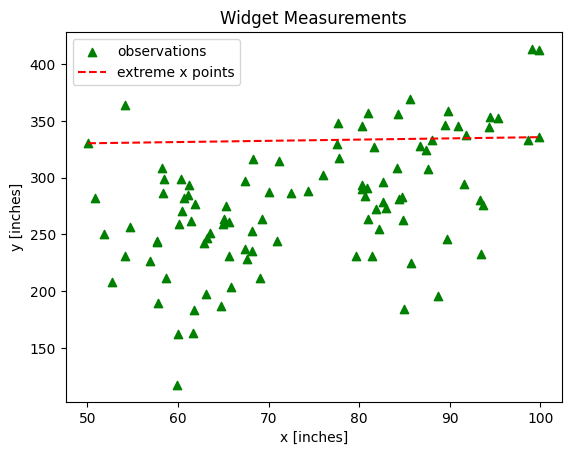

In [34]:
plt.scatter(x, y, color='green', marker='^', label='observations')

# Find the left-most and right-most points
x_min = x.min()
x_max = x.max()

# Plot a dashed red line from the left-most to the right-most point
plt.plot([x_min, x_max], [y[x.idxmin()], y[x.idxmax()]], color='red', linestyle='dashed', label='extreme x points')

# Add a title and labels
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Problem 2 - Histogram

In [35]:
data2 = pd.read_csv('/content/sample_data/student_grades.csv', comment='%')

In [36]:
avg_scores = data2.iloc[:, 1]
import numpy as np

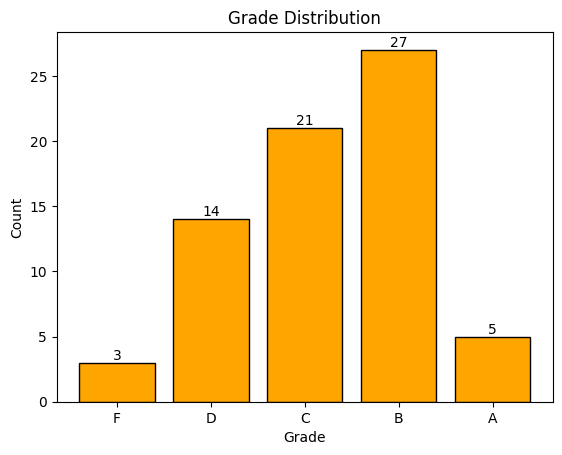

In [37]:
bins = [0, 60, 70, 80, 90, 100]  # Adjusted the upper bounds for 'B' and 'A'
labels = ['F', 'D', 'C', 'B', 'A']

# Create a histogram
hist, bin_edges = np.histogram(avg_scores, bins=bins)

# Plot the histogram with orange bars and black outlines
plt.bar(labels, hist, color='orange', edgecolor='black')

# Display counts above each bar
for i, count in enumerate(hist):
    plt.text(labels[i], count, str(int(count)), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

# Show the plot
plt.show()







### Problem 3 - Barplot and Boxplot in the Same Figure

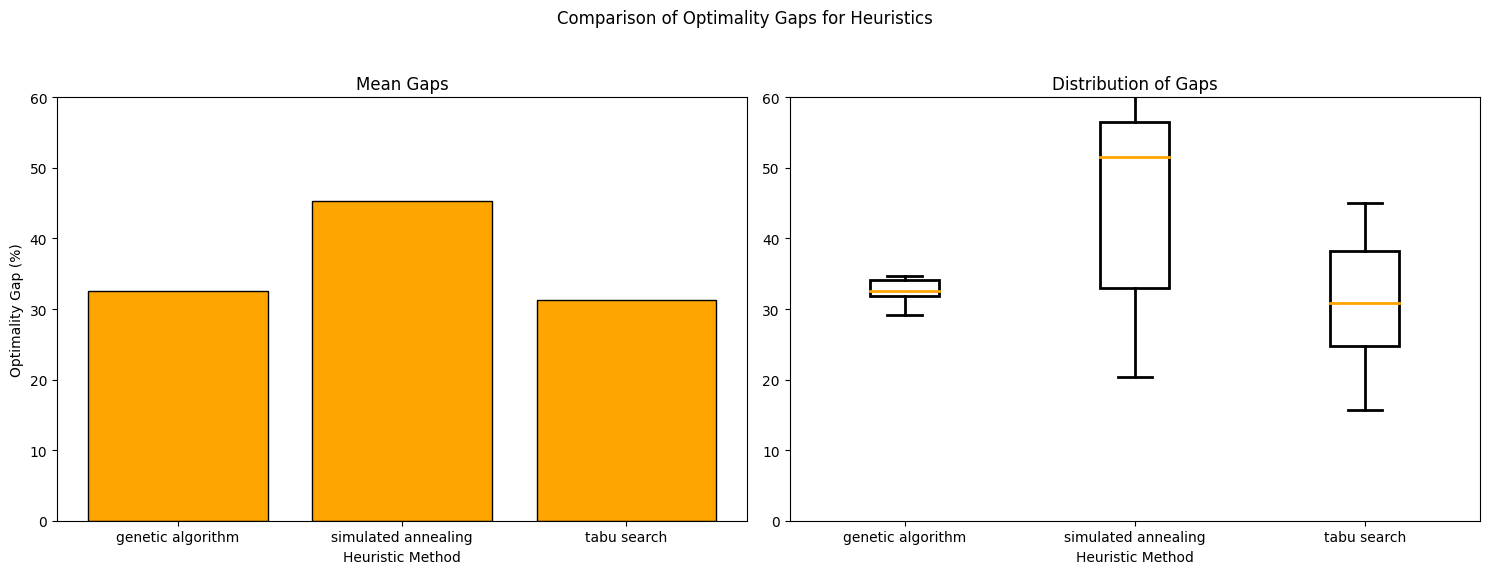

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Assuming the CSV is read correctly with the provided snapshot structure
data = pd.read_csv('/content/sample_data/solution_data.csv')

# Separate the optimal and heuristic values based on 'SolMethod'
optimal_values = data[data['SolnMethod'] == 'optimal'].iloc[:, 2].reset_index(drop=True)
heuristic_data = data[data['SolnMethod'] != 'optimal']

# Create a DataFrame to store optimality gaps for each heuristic method
gaps = pd.DataFrame()

# Compute optimality gaps
for method in heuristic_data['SolnMethod'].unique():
    heuristic_values = heuristic_data[heuristic_data['SolnMethod'] == method].iloc[:, 2].reset_index(drop=True)
    gaps[method] = ((optimal_values - heuristic_values) / optimal_values) * 100

# Calculate the mean gaps for the bar plot
mean_gaps = gaps.mean()

# Start the figure and the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparison of Optimality Gaps for Heuristics')


# Barplot for mean gaps
ax[0].bar(range(len(mean_gaps)), mean_gaps, color='orange', edgecolor='black')
ax[0].set_title('Mean Gaps')
ax[0].set_ylabel('Optimality Gap (%)')
ax[0].set_xlabel('Heuristic Method')
ax[0].set_xticks(range(len(mean_gaps)))
ax[0].set_xticklabels(mean_gaps.index)
ax[0].set_ylim(0, 60)  # set a consistent y-axis limit

# Boxplot for the distribution of gaps
bp = ax[1].boxplot([gaps[method].dropna() for method in gaps.columns], patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='black', linewidth=2)
    # change fill color
    box.set(facecolor='white')
# change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)
# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)
# change color and width of the medians
for median in bp['medians']:
    median.set(color='orange', linewidth=2)

ax[1].set_title('Distribution of Gaps')
ax[1].set_xlabel('Heuristic Method')
ax[1].set_xticklabels(gaps.columns)
ax[1].set_ylim(0, 60)  # to have the same scale on the y-axis as the barplot

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the padding between and around subplots
plt.show()



---
## Part 2 - Explore New Plot Types

I am going to use multiple sublplots for the dataset Telcochurn. The reason for using this type of plot for this dataset is to provide a representation of all variables and their relationship to one another in the form of plot, without congesting all the variables in one plot. This will give the reader a better understanding of the characteristic of each variable with respect to the other.With the subplot() function you can draw multiple plots in one figure

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/align_labels_demo.html#sphx-glr-gallery-subplots-axes-and-figures-align-labels-demo-py
- **URL of Sample Data**:  https://www.kaggle.com/datasets/blastchar/telco-customer-churn/

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("/content/sample_data/telcochurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


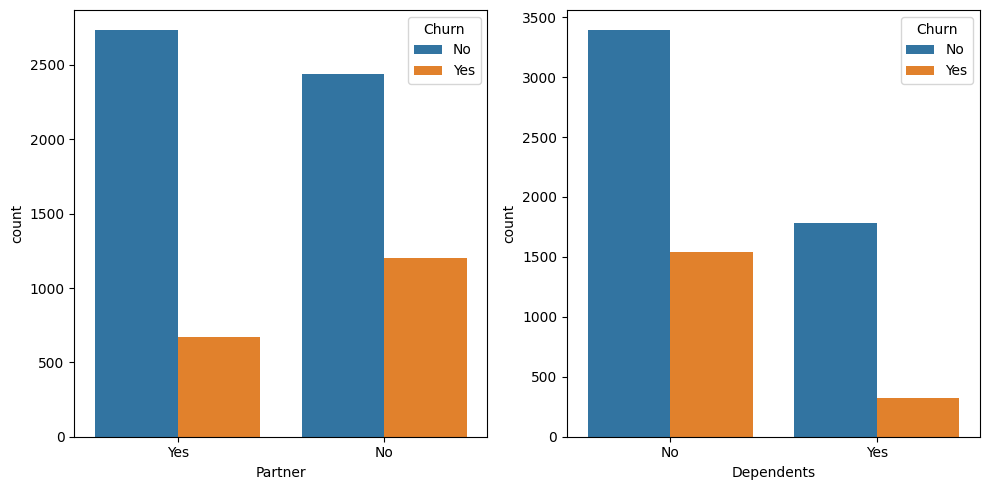

In [41]:

plt.figure(figsize=(10, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='Partner', hue='Churn', data=df)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='Dependents', hue='Churn', data=df)

plt.tight_layout()
plt.show()

In [42]:

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
feature = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [44]:

list(enumerate(feature))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'DeviceProtection'),
 (10, 'TechSupport'),
 (11, 'StreamingTV'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod')]

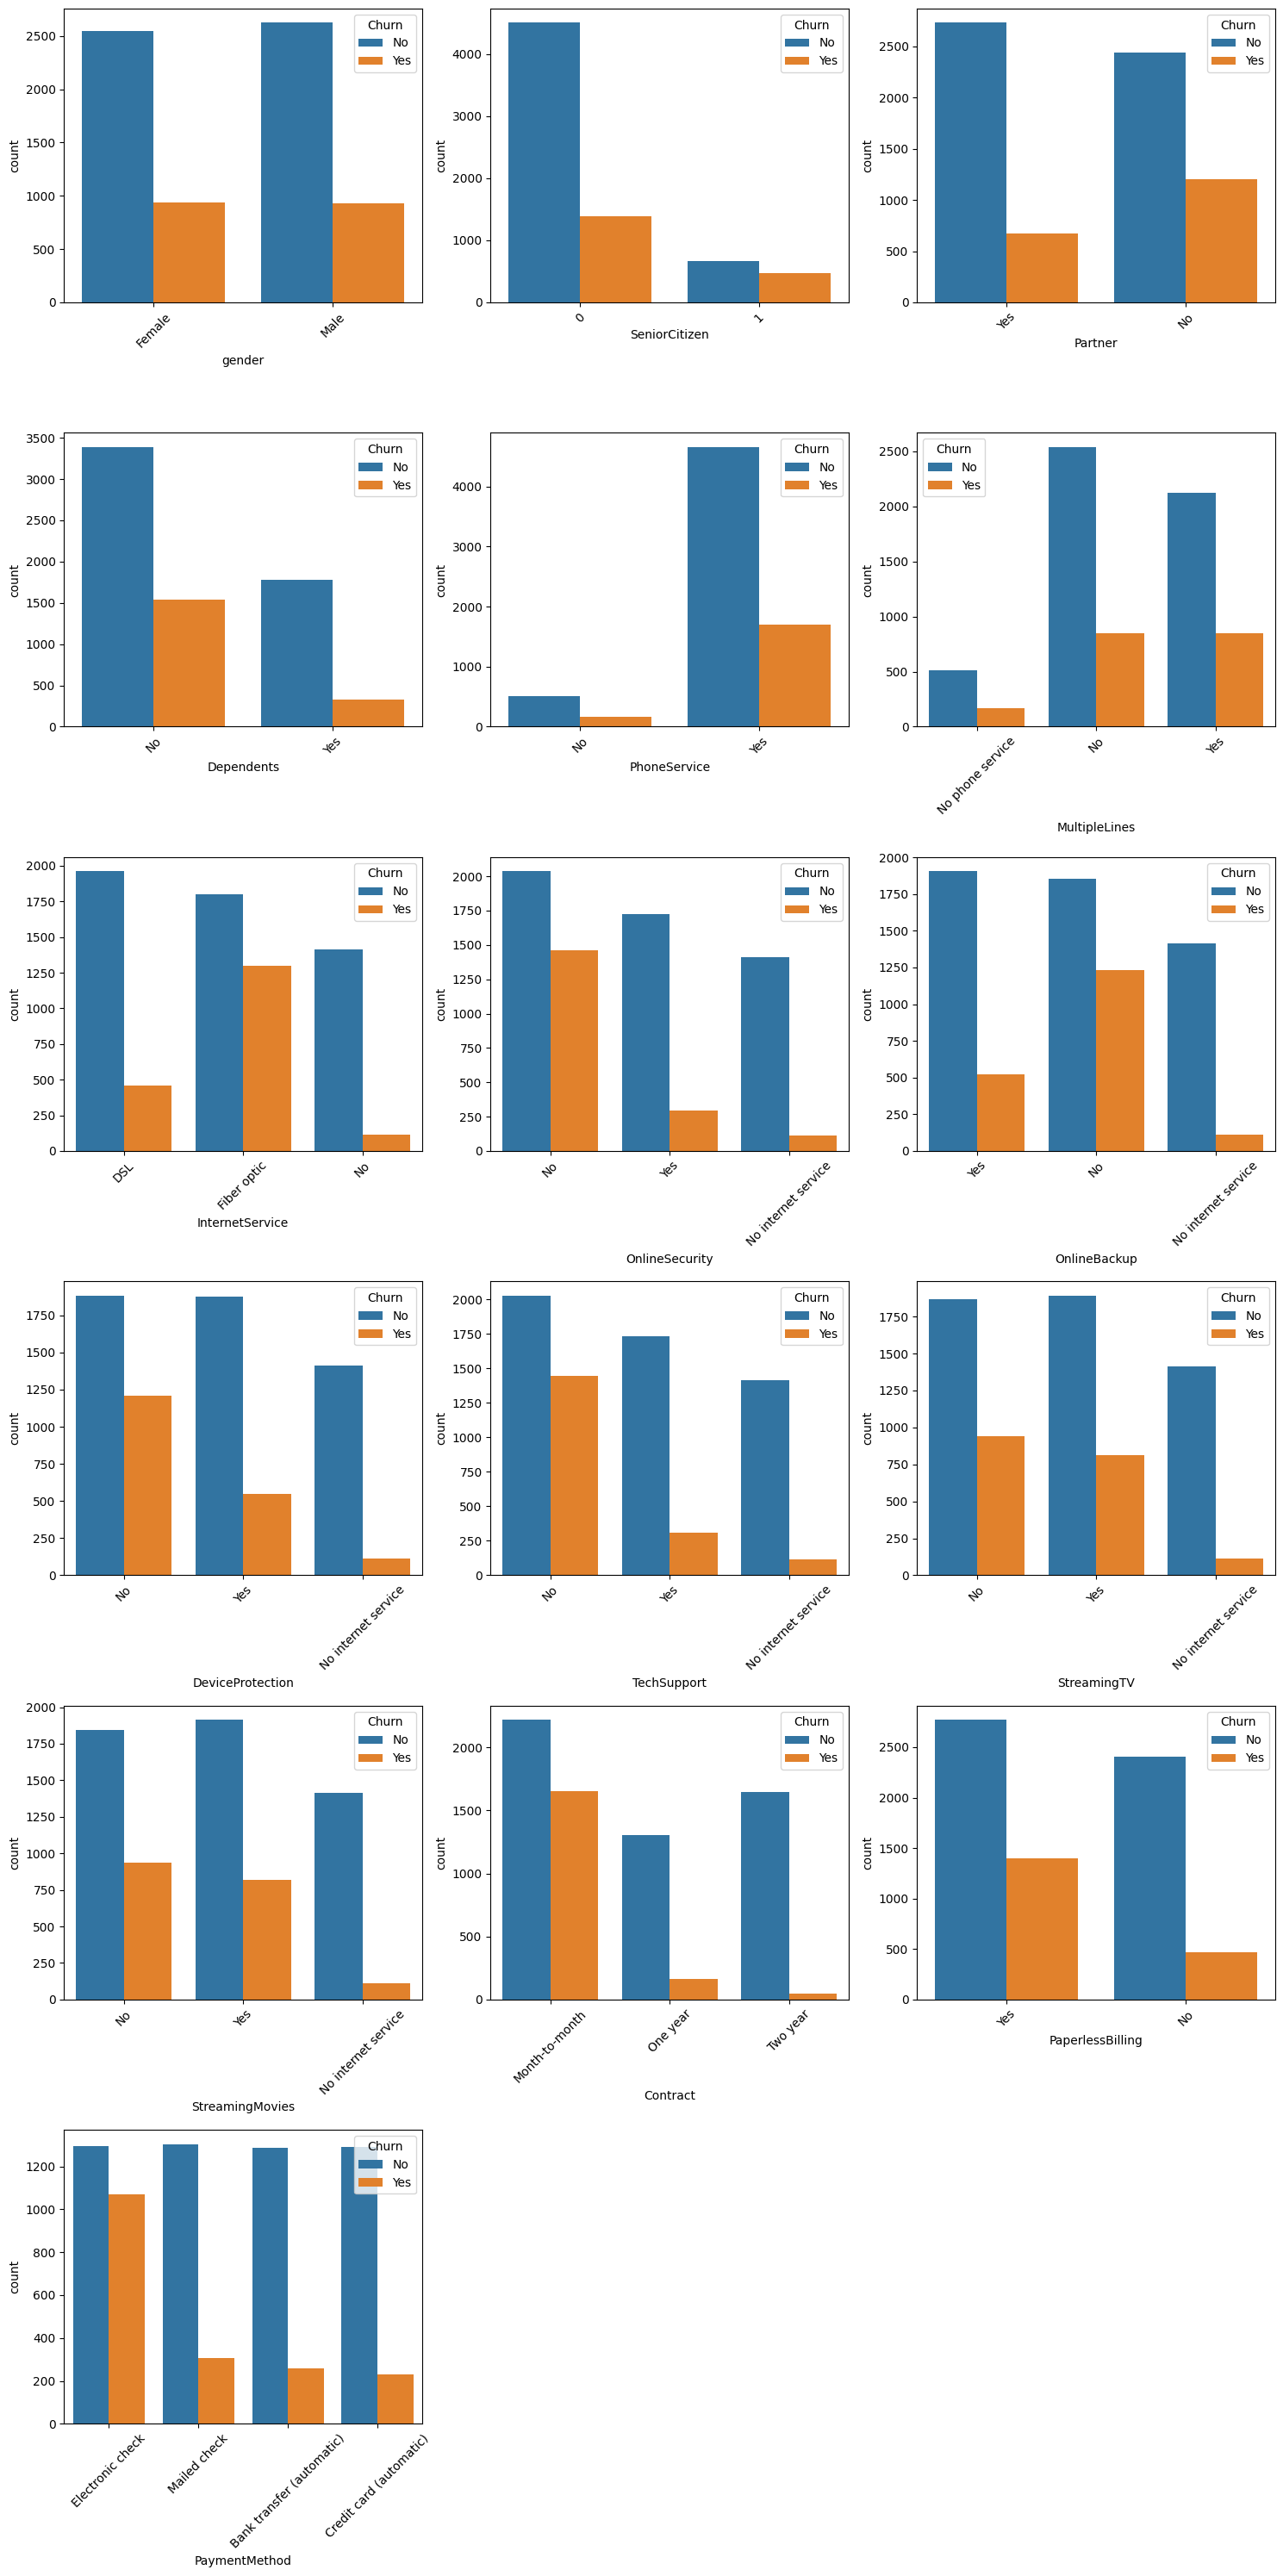

In [45]:
plt.figure(figsize=(15, 30))
for i in enumerate(feature):
    plt.subplot(6, 3, i[0]+1)
    sns.countplot(x=i[1], hue='Churn', data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
